# Optimización con restricciones 

## Optimización sin restricciones (recordemos)
$$
x* = argmin
$$

1. Calculo del gradiente 
2. Reemplzar el gradiente e igualar a cero $\nabla f (x^*) = 0$
3. Doble chequep con $\nabla ^2 f(x^*)$ para ver si la solución era factible

Pero que pasa si tuvieramos limitaciones como recursos fisicos, cantidades, personas, tiempo, etc. Ahora tenemos que decir que el problema esta sujeto a esas restricciones. 
$$
x^* = \underset{*}{argmin} f(x)
$$

Sujeta a 

$h_i (x) = 0$ para $i \in E$ (restriciones de igualdad)

$g_i \ge 0$ para $i \in I$ (restriciones de desigualdad)

Cuando se tiene un problema como este, se contruye la lagrangiana. 

$$
\mathcal{L}(\mu, \lambda, x) = f(x) - \mu_i h_i(x) - \lambda_i g_i(x)
$$

$h_i$ es igual a cero no hay problema. Pero con $g_i$ si. Como hacemos que esto $ \lambda_i g_i(x) = 0$

$$
\mathcal{L}(\mu, \lambda, x) = f(x) - \sum_{i\in\mathsf{e}}\mu_i h_i(x) - \sum_{i\in\mathsf{I}}\lambda_i g_i(x)
$$

El lagrangiano involugra 

- Las variables primales x 
- El vector de variables asociadas a las restriciones de igualdad ($\mu$)
- Variables asociadas a las restricciones de desigualdad ($\lambda$)

$$
(x^*, \mu^*, \lambda^*) = \underset{(x, \mu, \lambda)}{argmin}\mathcal{L}(x, \mu, \lambda)
$$

Queremos hayar los valores optimos de esto 
$$
\mathcal{L}(\mu, \lambda, x) = f(x^*) - \sum\mu_i^* h_i(x^*) - \sum\lambda_i^* g_i(x^*)
$$

El vector optimo donde 

$$
\lambda_i^* g_i (x^*) = 0 => \lambda_i^* = 0 \ \text{ó} \ g_i(x^*) = 0  
$$

en algun momento se volvio un problema sin restricciones. Asi que podemos aplicar lo que tenemos al principio. 

1. calcular el gradiente 
2. Igualarlo a cero 

$$
\nabla _x \mathcal{L} (x, \mu, \lambda) = \nabla_x f(x) - \sum\mu_i\nabla_x h_i(x) - \sum\lambda_i g_i(x) = 0
$$
Necesitamos

1. Restricciones primales $h_i (x^*) = 0$ y $g_i(x^*) \ge 0$ 
2. Variables duales de restricciones $\lambda_i \ge 0$
3. Holgura complementaria $\lambda_i^*g_i(x^*) = 0 => \lambda_i^* = 0$ o $g_i(x) = 0$

Condiciones KKT de optimalidad. Solo los que cumplan con estas condiciones son los optimos para resolver el problema

## EJemplo 

$$
f(x) = x_1^2 + x_2^2 
$$

Queremos resolver $x^* = \underset{x}argmin f(x)$

sujer

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
f = sp.parse_expr("x1**2 + x2**2")
xs = sp.Matrix(["x1", "x2"])
f
xs

x1**2 + x2**2

Matrix([
[x1],
[x2]])

In [3]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
Z = []

for xi in x:
    row = []
    for yi in y:
        to_rep = {xs[0]:xi, xs[1]:yi}
        row.append(f.subs(to_rep).evalf())
    Z.append(row)

Z = np.array(Z, dtype=np.float32)

<a list of 16 text.Text objects>

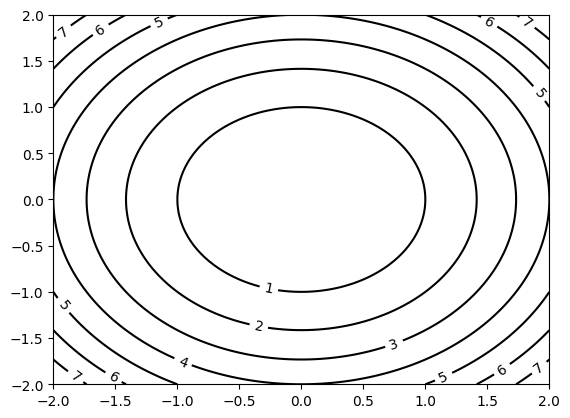

In [4]:
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots()
C = ax.contour(X, Y, Z, colors="k")
ax.clabel(C, inline=True)

In [5]:
gf = sp.Matrix([f]).jacobian(xs)
gf

Matrix([[2*x1, 2*x2]])

In [6]:
# igualar a cero 
cr = sp.solve(gf)
cr

{x1: 0, x2: 0}

In [7]:
gf.subs(cr)

Matrix([[0, 0]])

In [8]:
# calcular el hessiano 
Hf = gf.jacobian(xs)
Hf

Matrix([
[2, 0],
[0, 2]])

In [9]:
if (Hf.subs(cr).is_positive_definite): print("es un punto factible")
else: print("nanai")

es un punto factible


$$
f(x) = x_1^2 + x_2^2
$$

respñver $x^* = \underset{x}{argmin}f(x)$ sujero a $x_1 + x_2 = 1$  

1. construir la función lagrangiana 

In [10]:
h = xs[0] + xs[1] - 1
u = sp.symbols("\\mu")
L = f - u*h

h
L # el lagrangiano 

x1 + x2 - 1

-\mu*(x1 + x2 - 1) + x1**2 + x2**2

In [11]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
Z = []

for xi in x:
    row = []
    for yi in y:
        to_rep = {xs[0]:xi, xs[1]:yi}
        row.append(f.subs(to_rep).evalf())
    Z.append(row)

Z = np.array(Z, dtype=np.float32)

## EJemplo 

$$
f(x) = x_1^2 + x_2^2 
$$

Queremos resolver $x^* = \underset{x}argmin f(x)$

sujeto a 
$g({\bf x}) = 1 - x_1 - x_2 \ge 0$ (multiplicamos por -1)

la función lagrangiana quedaría 
$\mathcal{L} ({\bf x}, \lambda) = f({x}) -\lambda \cdot g(x) = x_1^2 $